**Thaneshwar Sahu**<br>
**PGID 12220083**<br>
**Marketing and Customer Analytics : Assignment 1**<br>
**Indian School of Business Hyderabad**


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

C:\Users\enggt\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\enggt\anaconda3\lib\site-packages\numpy\.libs\libopenblas.FB5AE2TYXYH2IJRDKGDGQ3XBKLKTF43H.gfortran-win_amd64.dll
C:\Users\enggt\anaconda3\lib\site-packages\numpy\.libs\libopenblas64__v0.3.21-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


**Loading Dataframe**

In [2]:
pref_df = pd.read_csv("C:/Users/enggt/OneDrive/Desktop/MCAN/MCAN 1/Assignment 1/mugs-preference-parameters-full.csv")

In [3]:
product_df = pd.read_csv("C:/Users/enggt/OneDrive/Desktop/MCAN/MCAN 1/mugs_candidate.csv")

In [4]:
pref_df.head()

,Cust,pPr30,pPr10,pPr05,pIn0.5,pIn1,pIn3,pCp12,pCp20,pCp32,...,pCnLk,pBrA,pBrB,pBrC,IPr,Iin,ICp,ICl,Icn,IBr
0,1,1,3,7,1,3,7,1,7,6,...,7,7,5,1,5,8,32,7,34,14
1,2,1,6,7,1,4,7,1,7,6,...,7,7,5,1,6,3,17,10,51,15
2,3,1,6,7,1,4,7,7,4,1,...,7,1,3,7,55,5,5,8,16,9
3,4,1,6,7,1,4,7,7,1,3,...,7,7,1,5,12,9,3,40,20,16
4,5,1,4,7,1,4,7,1,7,2,...,7,3,1,7,56,6,19,9,0,11


In [5]:
pref_df.columns

Index(['Cust', 'pPr30', 'pPr10', 'pPr05', 'pIn0.5', 'pIn1', 'pIn3', 'pCp12',
       'pCp20', 'pCp32', 'pClD', 'pClF', 'pClE', 'pCnSl', 'pCnSp', 'pCnLk',
       'pBrA', 'pBrB', 'pBrC', 'IPr', 'Iin', 'ICp', 'ICl', 'Icn', 'IBr'],
      dtype='object')

In [6]:
product_df.head()

,Product_candidate,Price,Time,Capacity,Cleanability,Containment,Brand
0,1,$30,0.5 hrs,12 oz,Difficult,Slosh resistant,C
1,2,$30,0.5 hrs,12 oz,Difficult,Spill resistant,C
2,3,$30,0.5 hrs,12 oz,Difficult,Leak resistant,C
3,4,$30,0.5 hrs,12 oz,Fair,Slosh resistant,C
4,5,$30,0.5 hrs,12 oz,Fair,Spill resistant,C


In [7]:
product_df.shape

(245, 7)

**Creating Dummy for Matrix Multiplication** 

In [8]:
one_hot_encoded_df = pd.get_dummies(product_df)

one_hot_encoded_df.head()

,Product_candidate,Price_$10,Price_$30,Price_$5,Time_ 0.5 hrs,Time_ 1 hrs,Time_ 3 hrs,Capacity_ 12 oz,Capacity_ 20 oz,Capacity_ 32 oz,Cleanability_ Difficult,Cleanability_ Easy,Cleanability_ Fair,Containment_ Leak resistant,Containment_ Slosh resistant,Containment_ Spill resistant,Brand_A,Brand_B,Brand_C
0,1,0,1,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1
1,2,0,1,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,1
2,3,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1
3,4,0,1,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,1
4,5,0,1,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,1


In [9]:
one_hot_encoded_df.columns

Index(['Product_candidate', 'Price_$10 ', 'Price_$30 ', 'Price_$5 ',
       'Time_ 0.5 hrs', 'Time_ 1 hrs', 'Time_ 3 hrs', 'Capacity_ 12 oz',
       'Capacity_ 20 oz', 'Capacity_ 32 oz', 'Cleanability_ Difficult',
       'Cleanability_ Easy', 'Cleanability_ Fair',
       'Containment_ Leak resistant', 'Containment_ Slosh resistant',
       'Containment_ Spill resistant', 'Brand_A', 'Brand_B', 'Brand_C'],
      dtype='object')

**Resetting the Column order to match the order of Preference Dataframe**

In [10]:
#Define the desired order of columns

column_order = ['Product_candidate','Price_$30 ','Price_$10 ','Price_$5 ',
                 'Time_ 0.5 hrs', 'Time_ 1 hrs', 'Time_ 3 hrs',
                 'Capacity_ 12 oz', 'Capacity_ 20 oz', 'Capacity_ 32 oz',
                 'Cleanability_ Difficult', 'Cleanability_ Fair','Cleanability_ Easy',
                 'Containment_ Slosh resistant', 'Containment_ Spill resistant','Containment_ Leak resistant','Brand_A', 'Brand_B', 'Brand_C']


In [11]:
one_hot_encoded_df_ordered = one_hot_encoded_df[column_order]

In [12]:
one_hot_encoded_df_ordered.head()

,Product_candidate,Price_$30,Price_$10,Price_$5,Time_ 0.5 hrs,Time_ 1 hrs,Time_ 3 hrs,Capacity_ 12 oz,Capacity_ 20 oz,Capacity_ 32 oz,Cleanability_ Difficult,Cleanability_ Fair,Cleanability_ Easy,Containment_ Slosh resistant,Containment_ Spill resistant,Containment_ Leak resistant,Brand_A,Brand_B,Brand_C
0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1
1,2,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1
2,3,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,1
3,4,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,1
4,5,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,1


In [13]:
one_hot_encoded_df_ordered.shape

(245, 19)

In [14]:
prod_df = one_hot_encoded_df_ordered.copy()

In [15]:
prod_df.head()

,Product_candidate,Price_$30,Price_$10,Price_$5,Time_ 0.5 hrs,Time_ 1 hrs,Time_ 3 hrs,Capacity_ 12 oz,Capacity_ 20 oz,Capacity_ 32 oz,Cleanability_ Difficult,Cleanability_ Fair,Cleanability_ Easy,Containment_ Slosh resistant,Containment_ Spill resistant,Containment_ Leak resistant,Brand_A,Brand_B,Brand_C
0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1
1,2,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1
2,3,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,1
3,4,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,1
4,5,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,1


In [16]:
pref_df.shape

(311, 25)

In [17]:
pref_df.head()

,Cust,pPr30,pPr10,pPr05,pIn0.5,pIn1,pIn3,pCp12,pCp20,pCp32,...,pCnLk,pBrA,pBrB,pBrC,IPr,Iin,ICp,ICl,Icn,IBr
0,1,1,3,7,1,3,7,1,7,6,...,7,7,5,1,5,8,32,7,34,14
1,2,1,6,7,1,4,7,1,7,6,...,7,7,5,1,6,3,17,10,51,15
2,3,1,6,7,1,4,7,7,4,1,...,7,1,3,7,55,5,5,8,16,9
3,4,1,6,7,1,4,7,7,1,3,...,7,7,1,5,12,9,3,40,20,16
4,5,1,4,7,1,4,7,1,7,2,...,7,3,1,7,56,6,19,9,0,11


In [18]:
pref_df.columns

Index(['Cust', 'pPr30', 'pPr10', 'pPr05', 'pIn0.5', 'pIn1', 'pIn3', 'pCp12',
       'pCp20', 'pCp32', 'pClD', 'pClF', 'pClE', 'pCnSl', 'pCnSp', 'pCnLk',
       'pBrA', 'pBrB', 'pBrC', 'IPr', 'Iin', 'ICp', 'ICl', 'Icn', 'IBr'],
      dtype='object')

**Creating weighted preference matrics by multiplying all the importance factor for the attributes recorded.**

In [19]:
import pandas as pd

# Assuming pref_df_new is your DataFrame
# If not, replace it with the actual name of your DataFrame

# Extract relevant columns
weights_columns = ['IPr', 'Iin', 'ICp', 'ICl', 'Icn','IBr']
attribute_columns = [['pPr30', 'pPr10', 'pPr05'], ['pIn0.5', 'pIn1', 'pIn3'], ['pCp12', 'pCp20', 'pCp32'], ['pClD', 'pClF', 'pClE'], ['pCnSl', 'pCnSp', 'pCnLk'],['pBrA', 'pBrB', 'pBrC']]

# Initialize the pref_df_weights DataFrame
pref_df_weights = pd.DataFrame()

# Perform the specified actions and save the values in pref_df_weights
for weight_col, attribute_cols in zip(weights_columns, attribute_columns):
    for attribute_col in attribute_cols:
        pref_df_weights[f'{weight_col}*{attribute_col}'] = pref_df[weight_col] * pref_df[attribute_col]

# Display the result or save it to a file if needed
pref_df_weights


,IPr*pPr30,IPr*pPr10,IPr*pPr05,Iin*pIn0.5,Iin*pIn1,Iin*pIn3,ICp*pCp12,ICp*pCp20,ICp*pCp32,ICl*pClD,ICl*pClF,ICl*pClE,Icn*pCnSl,Icn*pCnSp,Icn*pCnLk,IBr*pBrA,IBr*pBrB,IBr*pBrC
0,5,15,35,8,24,56,32,224,192,7,14,49,34,170,238,98,70,14
1,6,36,42,3,12,21,17,119,102,10,60,70,51,357,357,105,75,15
2,55,330,385,5,20,35,35,20,5,8,24,56,16,80,112,9,27,63
3,12,72,84,9,36,63,21,3,9,40,200,280,20,100,140,112,16,80
4,56,224,392,6,24,42,19,133,38,9,27,63,0,0,0,33,11,77
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
306,54,162,378,13,78,91,6,42,36,10,70,70,7,35,49,40,10,70
307,8,24,56,24,144,168,4,28,24,39,234,273,15,30,105,77,11,44
308,12,72,84,34,170,238,16,112,48,14,28,98,13,39,91,77,33,11
309,57,171,399,5,25,35,5,35,5,17,68,119,5,20,35,10,50,70


**Calculating Market Share for each product candidate for all the customer preferences**

In [40]:
# Assuming prod_df, pref_df_weights, and constant C are predefined
C = 0.0139

# Initialize an empty DataFrame to store the final average values
final_average_values = pd.DataFrame()

# Iterate through each row in prod_df, excluding the last two rows
for index in range(len(prod_df) - 2):
    # Select the current row and the last two rows
    temp_df = pd.concat([prod_df.iloc[[index]], prod_df.iloc[-2:]])

    # Transpose, drop the first row and reset index
    transposed_temp_df = temp_df.transpose().drop(index=temp_df.transpose().index[0]).reset_index(drop=True)

    # Matrix multiplication and calculations
    result_values = np.dot(pref_df_weights.values, transposed_temp_df.values)
    result_df = pd.DataFrame(result_values, columns=transposed_temp_df.columns)
    result_df_logit = result_df * C
    result_df_logit_exp = np.exp(result_df_logit)
    result_df_sum = result_df_logit_exp.sum(axis=1)
    result_df_normalized = result_df_logit_exp.div(result_df_sum, axis=0)

    # Calculate average of each column
    average_values = result_df_normalized.mean()
    temp_average_df = pd.DataFrame({
        'U': result_df_normalized.columns,
        'Average Values': average_values
    })

    # Add only the data related to the current row (exclude the last two rows)
    final_average_values = pd.concat([final_average_values, temp_average_df.iloc[:-2]])

# Display the final DataFrame with all average values
final_average_values


,U,Average Values
0,0,0.016530
1,1,0.025234
2,2,0.042167
3,3,0.033560
4,4,0.051275
...,...,...
238,238,0.455497
239,239,0.555399
240,240,0.441466
241,241,0.529777


In [41]:
final_average_values_new = final_average_values.copy()

In [48]:
# Rename the 'U' column to 'Product_candidate'
final_average_values_new.rename(columns={'U': 'Product_candidate'}, inplace=True)

# Reset the values in the 'Product_candidate' column to start from 1
final_average_values_new['Product_candidate'] = final_average_values_new.index + 1

# Display the modified DataFrame
final_average_values_new
final_average_values_new

,Product_candidate,Average Values
0,1,0.016530
1,2,0.025234
2,3,0.042167
3,4,0.033560
4,5,0.051275
...,...,...
238,239,0.455497
239,240,0.555399
240,241,0.441466
241,242,0.529777


In [53]:
product_df_cost = product_df.copy()

In [54]:
product_df_cost 

,Product_candidate,Price,Time,Capacity,Cleanability,Containment,Brand
0,1,$30,0.5 hrs,12 oz,Difficult,Slosh resistant,C
1,2,$30,0.5 hrs,12 oz,Difficult,Spill resistant,C
2,3,$30,0.5 hrs,12 oz,Difficult,Leak resistant,C
3,4,$30,0.5 hrs,12 oz,Fair,Slosh resistant,C
4,5,$30,0.5 hrs,12 oz,Fair,Spill resistant,C
...,...,...,...,...,...,...,...
240,241,$5,3 hrs,32 oz,Easy,Slosh resistant,C
241,242,$5,3 hrs,32 oz,Easy,Spill resistant,C
242,243,$5,3 hrs,32 oz,Easy,Leak resistant,C
243,244,$30,3 hrs,20 oz,Easy,Leak resistant,A


In [55]:
# Assuming 'product_df' is your DataFrame
product_df_cost  = product_df_cost .iloc[:-2]

# Now 'product_df' contains all rows except the last two
product_df_cost

,Product_candidate,Price,Time,Capacity,Cleanability,Containment,Brand
0,1,$30,0.5 hrs,12 oz,Difficult,Slosh resistant,C
1,2,$30,0.5 hrs,12 oz,Difficult,Spill resistant,C
2,3,$30,0.5 hrs,12 oz,Difficult,Leak resistant,C
3,4,$30,0.5 hrs,12 oz,Fair,Slosh resistant,C
4,5,$30,0.5 hrs,12 oz,Fair,Spill resistant,C
...,...,...,...,...,...,...,...
238,239,$5,3 hrs,32 oz,Fair,Spill resistant,C
239,240,$5,3 hrs,32 oz,Fair,Leak resistant,C
240,241,$5,3 hrs,32 oz,Easy,Slosh resistant,C
241,242,$5,3 hrs,32 oz,Easy,Spill resistant,C


In [56]:
#product_df_cost_1 = product_df_cost.drop('Brand')# # Drop the specified columns from pref_df
columns_to_drop = ['Brand']
product_df_cost_1 = product_df_cost.drop(columns=columns_to_drop)
product_df_cost_1

,Product_candidate,Price,Time,Capacity,Cleanability,Containment
0,1,$30,0.5 hrs,12 oz,Difficult,Slosh resistant
1,2,$30,0.5 hrs,12 oz,Difficult,Spill resistant
2,3,$30,0.5 hrs,12 oz,Difficult,Leak resistant
3,4,$30,0.5 hrs,12 oz,Fair,Slosh resistant
4,5,$30,0.5 hrs,12 oz,Fair,Spill resistant
...,...,...,...,...,...,...
238,239,$5,3 hrs,32 oz,Fair,Spill resistant
239,240,$5,3 hrs,32 oz,Fair,Leak resistant
240,241,$5,3 hrs,32 oz,Easy,Slosh resistant
241,242,$5,3 hrs,32 oz,Easy,Spill resistant


In [57]:
# Merge the two dataframes based on 'Product_candidate'
Final_df = pd.merge(product_df_cost_1, final_average_values_new, on='Product_candidate')

# Display the merged dataframe
Final_df

,Product_candidate,Price,Time,Capacity,Cleanability,Containment,Average Values
0,1,$30,0.5 hrs,12 oz,Difficult,Slosh resistant,0.016530
1,2,$30,0.5 hrs,12 oz,Difficult,Spill resistant,0.025234
2,3,$30,0.5 hrs,12 oz,Difficult,Leak resistant,0.042167
3,4,$30,0.5 hrs,12 oz,Fair,Slosh resistant,0.033560
4,5,$30,0.5 hrs,12 oz,Fair,Spill resistant,0.051275
...,...,...,...,...,...,...,...
238,239,$5,3 hrs,32 oz,Fair,Spill resistant,0.455497
239,240,$5,3 hrs,32 oz,Fair,Leak resistant,0.555399
240,241,$5,3 hrs,32 oz,Easy,Slosh resistant,0.441466
241,242,$5,3 hrs,32 oz,Easy,Spill resistant,0.529777


In [58]:
Df_cal = Final_df.copy()

In [59]:
# Print unique values for each column
for column in Df_cal:
    unique_values = Df_cal[column].unique()
    print(f"Unique values in column '{column}': {unique_values}")


Unique values in column 'Product_candidate': [  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162
 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180
 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198
 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216
 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234
 235 2

**Replacing Values to its cost structure to calculate the Cost**

In [60]:
# Define a mapping for replacement
time_mapping = {' 0.5 hrs': 0.5, ' 1 hrs': 1, ' 3 hrs': 3}
capacity_mapping = {' 12 oz': 1, ' 20 oz': 2.6, ' 32 oz': 2.8}
cleanability_mapping = {' Difficult': 1, ' Fair': 2.2, ' Easy': 3}
containment_mapping = {' Slosh resistant': 0.5, ' Spill resistant': 0.8, ' Leak resistant': 1}

# Replace values in the DataFrame
Df_cal.replace({
    'Price': {'$30 ': 30, '$10 ': 10, '$5 ': 5},
    'Time': time_mapping,
    'Capacity': capacity_mapping,
    'Cleanability': cleanability_mapping,
    'Containment': containment_mapping
}, inplace=True)

# Display the updated dataframe
Df_cal


,Product_candidate,Price,Time,Capacity,Cleanability,Containment,Average Values
0,1,30,0.5,1.0,1.0,0.5,0.016530
1,2,30,0.5,1.0,1.0,0.8,0.025234
2,3,30,0.5,1.0,1.0,1.0,0.042167
3,4,30,0.5,1.0,2.2,0.5,0.033560
4,5,30,0.5,1.0,2.2,0.8,0.051275
...,...,...,...,...,...,...,...
238,239,5,3.0,2.8,2.2,0.8,0.455497
239,240,5,3.0,2.8,2.2,1.0,0.555399
240,241,5,3.0,2.8,3.0,0.5,0.441466
241,242,5,3.0,2.8,3.0,0.8,0.529777


In [61]:
# Add values in columns Time, Capacity, Cleanability, Containment
Df_cal['Cost'] = Df_cal['Time'] + Df_cal['Capacity'] + Df_cal['Cleanability'] + Df_cal['Containment']

# Calculate Margin
Df_cal['Margin'] = Df_cal['Price'] - Df_cal['Cost']

# Calculate profit per person
Df_cal['Profit per Person'] = Df_cal['Margin'] * Df_cal['Average Values']

# Display the updated dataframe
Df_cal

,Product_candidate,Price,Time,Capacity,Cleanability,Containment,Average Values,Cost,Margin,Profit per Person
0,1,30,0.5,1.0,1.0,0.5,0.016530,3.0,27.0,0.446321
1,2,30,0.5,1.0,1.0,0.8,0.025234,3.3,26.7,0.673761
2,3,30,0.5,1.0,1.0,1.0,0.042167,3.5,26.5,1.117416
3,4,30,0.5,1.0,2.2,0.5,0.033560,4.2,25.8,0.865858
4,5,30,0.5,1.0,2.2,0.8,0.051275,4.5,25.5,1.307513
...,...,...,...,...,...,...,...,...,...,...
238,239,5,3.0,2.8,2.2,0.8,0.455497,8.8,-3.8,-1.730890
239,240,5,3.0,2.8,2.2,1.0,0.555399,9.0,-4.0,-2.221595
240,241,5,3.0,2.8,3.0,0.5,0.441466,9.3,-4.3,-1.898304
241,242,5,3.0,2.8,3.0,0.8,0.529777,9.6,-4.6,-2.436975


In [86]:
Df_cal.columns

Index(['Product_candidate', 'Price', 'Time', 'Capacity', 'Cleanability',
       'Containment', 'Average Values', 'Cost', 'Margin', 'Profit per Person'],
      dtype='object')

In [91]:
Df_cal_final = Df_cal.copy()

In [92]:
columns_to_drop = ['Price', 'Time', 'Capacity', 'Cleanability', 'Containment','Average Values']

# Drop the specified columns from the DataFrame
Df_cal_final = Df_cal_final.drop(columns=columns_to_drop)
Df_cal_final

,Product_candidate,Cost,Margin,Profit per Person
0,1,3.0,27.0,0.446321
1,2,3.3,26.7,0.673761
2,3,3.5,26.5,1.117416
3,4,4.2,25.8,0.865858
4,5,4.5,25.5,1.307513
...,...,...,...,...
238,239,8.8,-3.8,-1.730890
239,240,9.0,-4.0,-2.221595
240,241,9.3,-4.3,-1.898304
241,242,9.6,-4.6,-2.436975


**Final Dataframe of all 243 candidates with attributes cost,share,margin and expected profit per person**

In [94]:
# Merge the DataFrames based on the 'Product_candidate' column
Final_merged_df = Final_df.merge(Df_cal_final, on='Product_candidate')
Final_merged_df

,Product_candidate,Price,Time,Capacity,Cleanability,Containment,Average Values,Cost,Margin,Profit per Person
0,1,$30,0.5 hrs,12 oz,Difficult,Slosh resistant,0.016530,3.0,27.0,0.446321
1,2,$30,0.5 hrs,12 oz,Difficult,Spill resistant,0.025234,3.3,26.7,0.673761
2,3,$30,0.5 hrs,12 oz,Difficult,Leak resistant,0.042167,3.5,26.5,1.117416
3,4,$30,0.5 hrs,12 oz,Fair,Slosh resistant,0.033560,4.2,25.8,0.865858
4,5,$30,0.5 hrs,12 oz,Fair,Spill resistant,0.051275,4.5,25.5,1.307513
...,...,...,...,...,...,...,...,...,...,...
238,239,$5,3 hrs,32 oz,Fair,Spill resistant,0.455497,8.8,-3.8,-1.730890
239,240,$5,3 hrs,32 oz,Fair,Leak resistant,0.555399,9.0,-4.0,-2.221595
240,241,$5,3 hrs,32 oz,Easy,Slosh resistant,0.441466,9.3,-4.3,-1.898304
241,242,$5,3 hrs,32 oz,Easy,Spill resistant,0.529777,9.6,-4.6,-2.436975


In [95]:
# Save the DataFrame to a CSV file
Final_merged_df.to_csv("list_243_product_new.csv", index=False)

#### Answer 1st & 2nd 

In [96]:
# Assuming 'Df_cal' is your DataFrame

# Retrieve the data for 'Product candidate' 44, 229, and 105
product_candidates = [45, 230, 106]
selected_data = Final_merged_df[Final_merged_df['Product_candidate'].isin(product_candidates)]

# Display the selected data
selected_data


,Product_candidate,Price,Time,Capacity,Cleanability,Containment,Average Values,Cost,Margin,Profit per Person
44,45,$30,1 hrs,20 oz,Easy,Leak resistant,0.194526,7.6,22.4,4.357385
105,106,$10,0.5 hrs,32 oz,Easy,Slosh resistant,0.239407,6.8,3.2,0.766103
229,230,$5,3 hrs,20 oz,Fair,Spill resistant,0.504324,8.6,-3.6,-1.815565


#### Answer 3

In [122]:
# Sort the DataFrame by "Profit per Person" column in descending order
sorted_df = Final_merged_df.sort_values(by="Profit per Person", ascending=False)

# Get the product with the highest expected profit per person (the first row)
optimal_product = sorted_df.iloc[0]

# Create a DataFrame for the optimal product
optimal_product_df = pd.DataFrame({
    "Product_candidate": [optimal_product["Product_candidate"]],
    "Price": [optimal_product["Price"]],
    "Time": [optimal_product["Time"]],
    "Capacity": [optimal_product["Capacity"]],
    "Cleanability": [optimal_product["Cleanability"]],
    "Containment": [optimal_product["Containment"]],
    "Share": [optimal_product["Average Values"]],
    "Cost": [optimal_product["Cost"]],
    "Margin": [optimal_product["Margin"]],
    "Expected Profit per Person": [optimal_product["Profit per Person"]]
})

# Display the DataFrame for the optimal product
optimal_product_df

,Product_candidate,Price,Time,Capacity,Cleanability,Containment,Share,Cost,Margin,Expected Profit per Person
0,72,30.0,3 hrs,20 oz,Easy,Leak resistant,0.25884,9.6,20.4,5.280343


#### Answer 4/1

In [123]:
# Identify the product with the highest market share
highest_share_product = Final_merged_df[Final_merged_df['Average Values'] == Final_merged_df['Average Values'].max()]

# Get the values of the five attributes for the product with the highest market share
attributes_of_highest_share_product = highest_share_product.iloc[0][['Product_candidate','Price', 'Time', 'Capacity', 'Cleanability', 'Containment','Average Values']]

# Display the values of the attributes
print("Values of the five attributes for the product with the highest market share:")
attributes_of_highest_share_product

Values of the five attributes for the product with the highest market share:


Product_candidate                234
Price                            5.0
Time                           3 hrs
Capacity                       20 oz
Cleanability                    Easy
Containment           Leak resistant
Average Values              0.696713
Name: 233, dtype: object

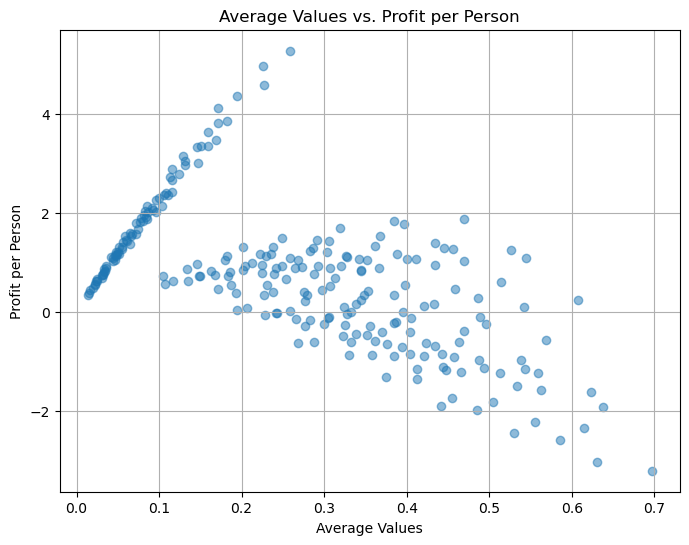

In [101]:
# Create a scatter plot of Average Values vs. Profit per Person
plt.figure(figsize=(8, 6))
plt.scatter(Final_merged_df['Average Values'], Final_merged_df['Profit per Person'], marker='o', alpha=0.5)
plt.xlabel("Average Values")
plt.ylabel("Profit per Person")
plt.title("Average Values vs. Profit per Person")
plt.grid(True)
plt.show()

#### Answer 4/2 

In [108]:
# Find the product(s) with the highest margin
highest_margin_products = Final_merged_df[Final_merged_df['Margin'] == Final_merged_df['Margin'].max()]

# Get the values of the five attributes for the product(s) with the highest margin
attributes_of_highest_margin_product = highest_margin_products[['Price', 'Time', 'Capacity', 'Cleanability', 'Containment','Cost','Margin','Average Values','Profit per Person']]

# Display the product(s) with the highest margin and their attributes
print("Product(s) with the highest margin:")
highest_margin_products
print("\nValues of the five attributes for the product(s) with the highest margin:")
attributes_of_highest_margin_product

Product(s) with the highest margin:

Values of the five attributes for the product(s) with the highest margin:


,Price,Time,Capacity,Cleanability,Containment,Cost,Margin,Average Values,Profit per Person
0,$30,0.5 hrs,12 oz,Difficult,Slosh resistant,3.0,27.0,0.01653,0.446321


#### Answer 4/3

In [124]:
# Find the product(s) with the lowest cost
lowest_cost_products = Final_merged_df[Final_merged_df['Cost'] == Final_merged_df['Cost'].min()]

# Get the values of the five attributes for the product(s) with the lowest cost
attributes_of_lowest_cost_product = lowest_cost_products[['Product_candidate','Price', 'Time', 'Capacity', 'Cleanability', 'Containment','Cost','Margin','Average Values','Profit per Person']]

# Display the product(s) with the lowest cost and their attributes
print("Product(s) with the lowest cost:")
lowest_cost_products
print("\nValues of the five attributes for the product(s) with the lowest cost:")
attributes_of_lowest_cost_product

Product(s) with the lowest cost:

Values of the five attributes for the product(s) with the lowest cost:


,Product_candidate,Price,Time,Capacity,Cleanability,Containment,Cost,Margin,Average Values,Profit per Person
0,1,30.0,0.5 hrs,12 oz,Difficult,Slosh resistant,3.0,27.0,0.016530,0.446321
81,82,10.0,0.5 hrs,12 oz,Difficult,Slosh resistant,3.0,7.0,0.105133,0.735932
162,163,5.0,0.5 hrs,12 oz,Difficult,Slosh resistant,3.0,2.0,0.193544,0.387089


#### Answer 4/4

In [125]:
# Calculate revenue per person for each product in the 'Df_cal' DataFrame using 'Average Values'
Df_cal['Revenue per Person'] = Df_cal['Average Values'] * Df_cal['Price']

# Find the product(s) with the highest revenue per person
highest_revenue_per_person_products = Df_cal[Df_cal['Revenue per Person'] == Df_cal['Revenue per Person'].max()]

# Get the values of the five attributes for the product(s) with the highest revenue per person
attributes_of_highest_revenue_per_person_product = highest_revenue_per_person_products[['Product_candidate','Price', 'Time', 'Capacity', 'Cleanability', 'Containment','Cost','Margin','Average Values','Profit per Person']]

# Display the product(s) with the highest revenue per person and their attributes
print("Product(s) with the highest revenue per person:")
highest_revenue_per_person_products
print("\nValues of the five attributes for the product(s) with the highest revenue per person:")
attributes_of_highest_revenue_per_person_product

Product(s) with the highest revenue per person:

Values of the five attributes for the product(s) with the highest revenue per person:


,Product_candidate,Price,Time,Capacity,Cleanability,Containment,Cost,Margin,Average Values,Profit per Person
71,72,30,3.0,2.6,3.0,1.0,9.6,20.4,0.25884,5.280343


In [128]:
# Reset the index of 'attributes_of_highest_revenue_per_person_product'
attributes_of_highest_revenue_per_person_product.reset_index(inplace=True)

# Get the 'Product_candidate' value(s) from 'attributes_of_highest_revenue_per_person_product'
product_candidates = attributes_of_highest_revenue_per_person_product['Product_candidate'].tolist()

# Filter 'Final_merged_df' to match 'Product_candidate' values
corresponding_rows_in_final_df = Final_merged_df[Final_merged_df['Product_candidate'].isin(product_candidates)]

# Print the corresponding rows in 'Final_merged_df'
print("Corresponding rows in 'Final_merged_df' for the highest revenue per person product(s):")
corresponding_rows_in_final_df


Corresponding rows in 'Final_merged_df' for the highest revenue per person product(s):


,Product_candidate,Price,Time,Capacity,Cleanability,Containment,Average Values,Cost,Margin,Profit per Person,Revenue per Person
71,72,30.0,3 hrs,20 oz,Easy,Leak resistant,0.25884,9.6,20.4,5.280343,7.76521


--End--